<a href="https://colab.research.google.com/github/emmelinetsen/deep_learning/blob/master/assignment_4/LeNet_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN basics : use KERAS and from scratch (not using existing architecture shipped models) write basic LeNet (mnist) and VGG-16 model (cifar100)  and RESNET (only 8 layers - not 52) architectures - run on gpu - train and report all the stats (see some pointers in slides)

---

Tensorboard.dev: https://tensorboard.dev/experiment/fzXuGVo1S6C1xCLKSmPECw/#scalars

Tensorboard.dev with 50 iterations: https://tensorboard.dev/experiment/v4u9hM11RNeORPYaRKvrUg/#scalars

In [4]:
import numpy as np
from tensorflow.keras.datasets import mnist

np.random.seed(1)

# loading the mnist data into training and testing data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# getting the first 1000 data and reshaping the dataset for the first 1000
# scaling the input to 255
# img, labels = (x_train[0:1000].reshape(1000,28*28) / 255), y_train[0:1000]
# img = np.expand_dims(img, axis=-1)
img, labels = (x_train[0:1000].reshape(1000,28,28,1), y_train[0:1000])


# creating an array of zeros 
one_hot_labels = np.zeros((len(labels), 10))


# assigning 1 to where the label would be for that particular array
# for example, if the array 
for i,l in enumerate(labels):
  one_hot_labels[i][l] = 1
labels = one_hot_labels

import sys, numpy as np

test_img = x_test.reshape(len(x_test), 28, 28,1)
test_label = np.zeros((len(y_test), 10))

for i,l in enumerate(y_test):
    test_label[i][l] = 1

# LeNet architecture takes in 32x32 and mnist dataset is 28x28
# Pad images with 0s

img = np.pad(img, ((0,0),(2,2),(2,2),(0,0)), 'constant')
test_img = np.pad(test_img, ((0,0),(2,2),(2,2),(0,0)), 'constant')

11493376/11490434 [==============================] - 0s 0us/step


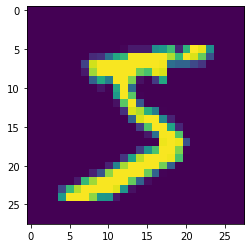

In [0]:
from matplotlib import pyplot

pyplot.imshow(x_train[0].reshape(28,28))


### Architecture
Convolutional #1 outputs 28x28x6

Activation any activation function, we will relu
Pooling #1 The output shape should be 14x14x6.

Convolutional #2 outputs 10x10x16.

Activation any activation function, we will relu
Pooling #2 outputs 5x5x16.

Flatten Flatten the output shape of the final pooling layer
Fully Connected #1 outputs 120

Activation any activation function, we will relu
Fully Connected #2 outputs 84

Activation any activation function, we will relu
Fully Connected (Logits) #3 outpute 10

In [0]:
import keras
import keras.layers as layers
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, BatchNormalization, Activation
from keras.models import Sequential


def create_model():
  model = keras.Sequential()

  model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1)))
  model.add(layers.AveragePooling2D())

  model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
  model.add(layers.AveragePooling2D())

  model.add(layers.Flatten())

  model.add(layers.Dense(units=120, activation='relu'))

  model.add(layers.Dense(units=84, activation='relu'))

  model.add(layers.Dense(units=10, activation = 'softmax'))

  return model

model = create_model()
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 6)         60        
_________________________________________________________________
average_pooling2d_1 (Average (None, 15, 15, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 16)        880       
_________________________________________________________________
average_pooling2d_2 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               69240     
_________________________________________________________________
dense_2 (Dense)              (None, 84)               

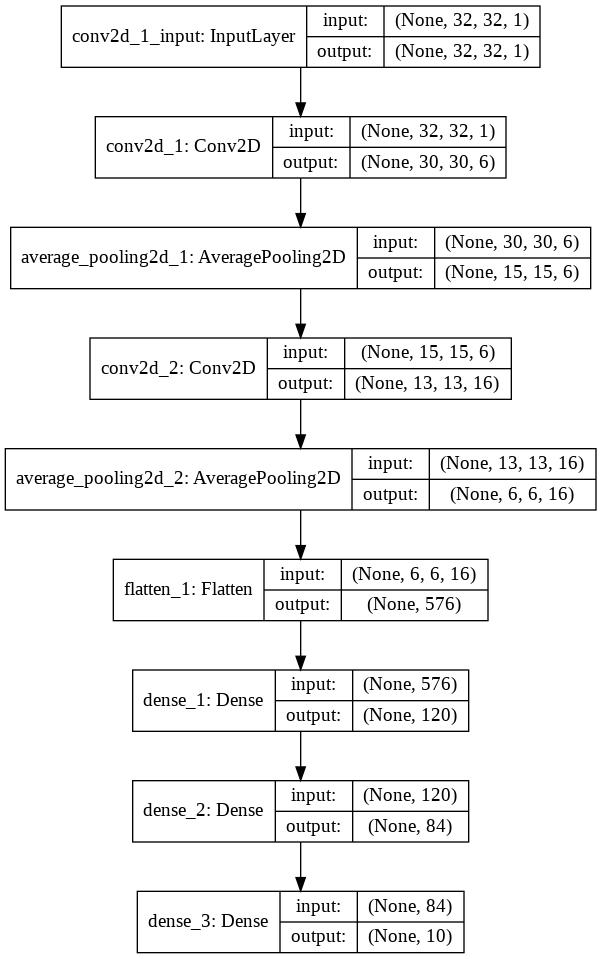

In [42]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)

In [0]:
test_img.shape

(10000, 32, 32, 1)

In [0]:
# create tensorboard
import tensorflow as tf
import datetime
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, TensorBoard

opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.binary_crossentropy, metrics=['accuracy'])
              

log_dir="logs/letnet-keras" 
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(x=img, 
          y=labels, 
          epochs=50, 
          validation_data=(test_img, test_label), 
          callbacks=[tensorboard_callback])

Train on 1000 samples, validate on 10000 samples
Epoch 1/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.7167 - accuracy: 0.8828 - val_loss: 0.2007 - val_accuracy: 0.9293
Epoch 2/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1024 - accuracy: 0.9642 - val_loss: 0.0880 - val_accuracy: 0.9683
Epoch 3/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0550 - accuracy: 0.9817 - val_loss: 0.0775 - val_accuracy: 0.9710
Epoch 4/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0333 - accuracy: 0.9894 - val_loss: 0.0570 - val_accuracy: 0.9797
Epoch 5/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0198 - accuracy: 0.9941 - val_loss: 0.0542 - val_accuracy: 0.9809
Epoch 6/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0117 - accuracy: 0.9970 - val_loss: 0.0576 - val_accuracy: 0.9804
Epoch 7/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0085 - ac

In [0]:
model.save('/content/drive/My Drive/CMPE 258 - Deep Learning/Assignments/Assignment 4/lenet.h5')

In [0]:
!tensorboard dev upload --logdir ./logs \
  --name "MNIST Classification using LeNet with Keras"

In [14]:
model.evaluate(test_img, test_label)

10000/10000 [==============================] - 1s 80us/step


[0.0555320845752165, 0.9865092635154724]

## Visualization

In [5]:
from keras.preprocessing import image



img_tensor = image.img_to_array(img[0])
img_tensor = np.expand_dims(img_tensor, axis=0)

# img = np.pad(img, ((0,0),(2,2),(2,2),(0,0)), 'constant')

# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.

# Its shape is (1, 32, 32, 1)
print(img_tensor.shape)


(1, 32, 32, 1)


In [0]:
from keras.models import load_model

model = load_model('/content/drive/My Drive/CMPE 258 - Deep Learning/Assignments/Assignment 4/lenet.h5')

In [0]:
from keras import models

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

# This will return a list of 5 Numpy arrays:
# one array per layer activation
activations = activation_model.predict(img_tensor)

In [7]:
first_layer_activation = activations[0]

# printing the first layer of the mnist dataset
# it's a 30x30 feature map with 6 channels
print(first_layer_activation.shape)

(1, 30, 30, 6)


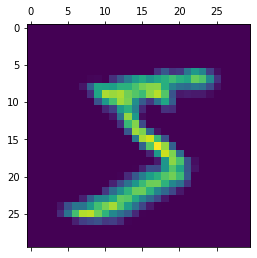

In [8]:
import matplotlib.pyplot as plt

# viewing the 3rd channel 
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

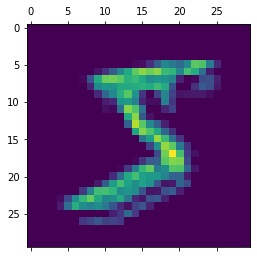

In [0]:
# viewing the 5th channel
plt.matshow(first_layer_activation[0, :, :, 5], cmap='viridis')
plt.show()

In [38]:
layer_activation.shape

(1, 576)

IndexError: ignored

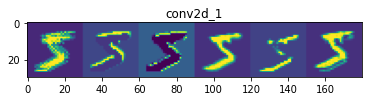

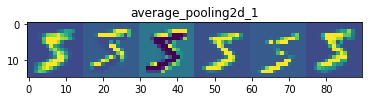

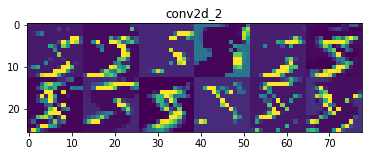

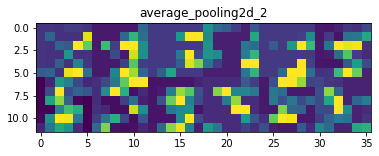

In [13]:
import keras

# the names of the layers
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 6

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()